In [2]:
import numpy as np 
import astropy.units as u


import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16

In [3]:
def get_mean_square_energy(mean_energy, alpha):
    return (2+alpha)/(1+alpha) * mean_energy **2

def get_spectrum(energy, mean_energy, alpha):
    dist = (energy ** alpha) * np.exp(-(alpha+1)*energy/mean_energy)
    return dist/np.sum(dist)

In [4]:
mean_energy_low = 10 * u.MeV
mean_energy_high = 15 * u.MeV

alpha_low = 2
alpha_high = 4

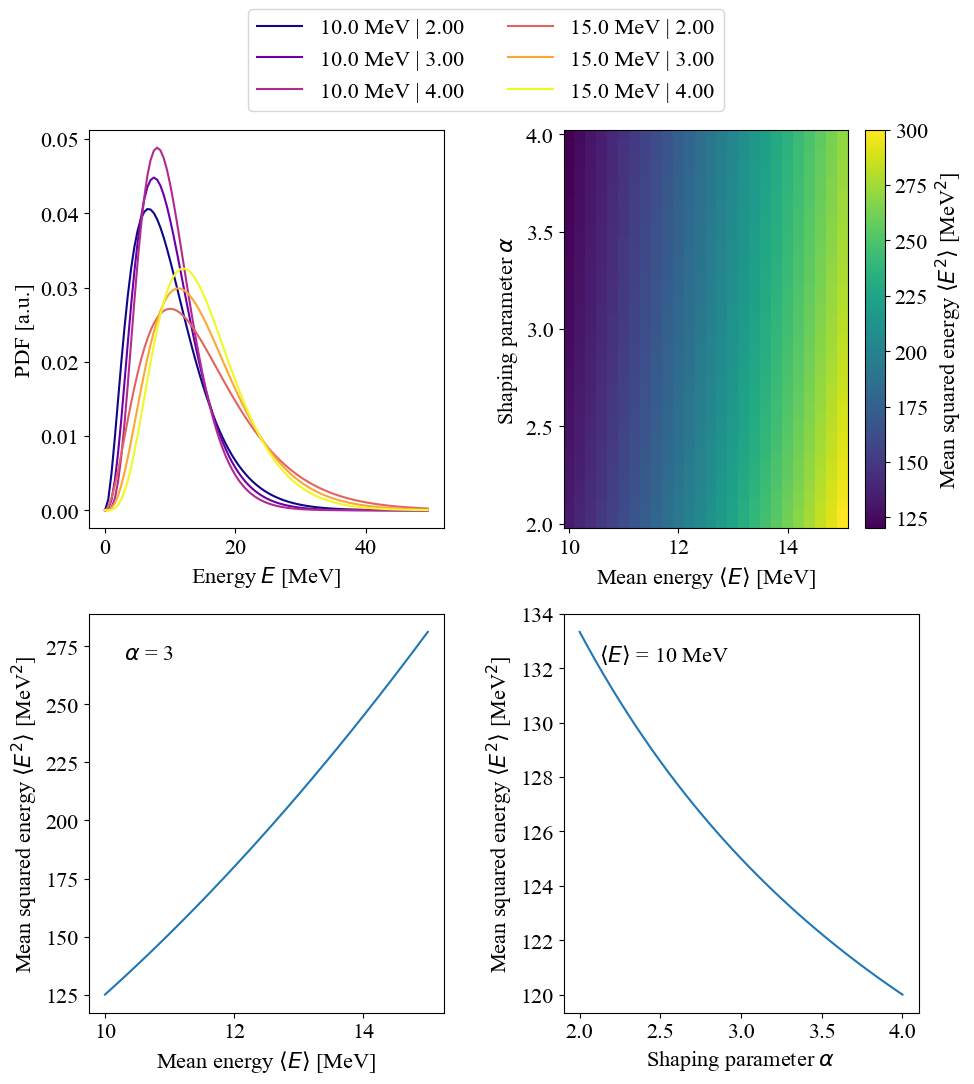

In [5]:
alpha_range = np.round(np.arange(alpha_low, alpha_high+0.05, 0.05), 2)
mean_energy_range = np.round(np.arange(mean_energy_low.value, mean_energy_high.value+0.2, 0.2), 1)

energy = np.arange(0,50,0.5)

er, ar = np.meshgrid(mean_energy_range, alpha_range)
mser = get_mean_square_energy(er, ar)

fig, ax = plt.subplots(2,2, figsize = (10,10))
ax = ax.ravel()

j = 0
ess = mean_energy_range[::25]
ass = alpha_range[::20]
for e in ess:
    for a in ass:
        color = cm.plasma(j/(len(ess)*len(ass)-1))
        ax[0].plot(energy,get_spectrum(energy, e, a), label = "{:.1f} MeV | {:.2f}".format(e,a) , color = color)
        j += 1

ax[0].set_xlabel(r"Energy $ E $ [MeV]")
ax[0].set_ylabel("PDF [a.u.]")
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=2, bbox_to_anchor=(0.5, 1.1))

im = ax[1].pcolormesh(er, ar, mser)
ax[1].set_xlabel(r"Mean energy $\langle E \rangle$ [MeV]")
ax[1].set_ylabel(r"Shaping parameter $\alpha$")
cb = fig.colorbar(im)
cb.set_label(r"Mean squared energy $\langle E^2 \rangle$ [MeV$^2$]")

# plot mean-energy vs. mean-squared energy at alpha = 3
alpha = 3
ind = np.argwhere(alpha_range == alpha).item()
ax[2].plot(mean_energy_range, mser[ind,:])
ax[2].set_xlabel(r"Mean energy $\langle E \rangle$ [MeV]")
ax[2].set_ylabel(r"Mean squared energy $\langle E^2 \rangle$ [MeV$^2$]")
ax[2].text(x = 0.1, y = 0.9, s = r"$\alpha$ = {}".format(alpha), transform = ax[2].transAxes, ha = "left", va = "center")

# plot alpha vs. mean-squared energy at mean energy = 10 MeV
mean_energy = 10
ind = np.argwhere(mean_energy_range == mean_energy).item()
ax[3].plot(alpha_range, mser[:,ind])
ax[3].set_xlabel(r"Shaping parameter $\alpha$")
ax[3].set_ylabel(r"Mean squared energy $\langle E^2 \rangle$ [MeV$^2$]")
ax[3].text(x = 0.1, y = 0.9, s = r"$\langle E \rangle$ = {} MeV".format(mean_energy), transform = ax[3].transAxes, ha = "left", va = "center")

plt.tight_layout()